
#     __COVID-19__ Analysis and Prediction 

 ###  " A Complex Analysis yet for a Layman "  

### __Required Modules__


In [103]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import datetime
sns.set(style = 'darkgrid')

### __Script which Dynamically fetches the Data of a particular 'Country'__ 
#### The output Bar-Chart is the representation of the country's  current status of this unprecedented pandemic 

In [104]:
# covid = Covid()

# countries = list(covid.list_countries())
# countries_list = list()

# countries_list = [list(dict(countries[x]).values())[1] for x in range(len(countries))]
# print(countries_list)
# while True:
#     try:
#          country = input('Enter the country of desire : ')
#          data = covid.get_status_by_country_name(country)

#     except ValueError:
#          print('Entered country name was invalid, \nRe-Enter : ')
#          continue
#     else:
#          data = covid.get_status_by_country_name(country)

#     break

# dictionary = {
#      key : data[key]


#      for key in data.keys() & ("confirmed","active","deaths","recovered")
# }


# key = list(dictionary.keys())
# values = list(map(int,dictionary.values()))

# print(dictionary)

# active_tot = int(covid.get_total_active_cases())
# recovered_tot = int(covid.get_total_recovered())
# confirmed_tot = int(covid.get_total_confirmed_cases())

# total_numericals = dict({'Total Recovered' : recovered_tot, 'Total Active' : active_tot, 'Total Confirmmed': confirmed_tot,})

# print("Total Cases around the world : {} ".format(total_numericals))

# plt.figure(figsize=(7,7))
# plt.title("Dynamic-Chart",size=20)
# plt.xlabel("Essentials",size=17)
# plt.ylabel("Range",size=17)
# plt.bar(key,values,color='black',edgecolor = 'red')
# plt.show()


### __Getting to know the Dataset__ 

In [105]:
data = pd.read_csv('covid_19_data.csv')
data.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [106]:
print("Number of Datapoints : {}".format(data.size))
print("Shape of the DataSet : {}".format(data.shape))

Number of Datapoints : 478072
Shape of the DataSet : (59759, 8)


In [107]:
dates = np.unique(data.ObservationDate) #dates 
print("These are the Recored Dates Starting from 01/22/2020 \n\n {}".format(dates))
print("\nLast Dates recorded : {}".format(data.iat[(data.shape[0]-1),1]))

These are the Recored Dates Starting from 01/22/2020 

 ['01/22/2020' '01/23/2020' '01/24/2020' '01/25/2020' '01/26/2020'
 '01/27/2020' '01/28/2020' '01/29/2020' '01/30/2020' '01/31/2020'
 '02/01/2020' '02/02/2020' '02/03/2020' '02/04/2020' '02/05/2020'
 '02/06/2020' '02/07/2020' '02/08/2020' '02/09/2020' '02/10/2020'
 '02/11/2020' '02/12/2020' '02/13/2020' '02/14/2020' '02/15/2020'
 '02/16/2020' '02/17/2020' '02/18/2020' '02/19/2020' '02/20/2020'
 '02/21/2020' '02/22/2020' '02/23/2020' '02/24/2020' '02/25/2020'
 '02/26/2020' '02/27/2020' '02/28/2020' '02/29/2020' '03/01/2020'
 '03/02/2020' '03/03/2020' '03/04/2020' '03/05/2020' '03/06/2020'
 '03/07/2020' '03/08/2020' '03/09/2020' '03/10/2020' '03/11/2020'
 '03/12/2020' '03/13/2020' '03/14/2020' '03/15/2020' '03/16/2020'
 '03/17/2020' '03/18/2020' '03/19/2020' '03/20/2020' '03/21/2020'
 '03/22/2020' '03/23/2020' '03/24/2020' '03/25/2020' '03/26/2020'
 '03/27/2020' '03/28/2020' '03/29/2020' '03/30/2020' '03/31/2020'
 '04/01/2020' '04/02

#### Knowing the Datatypes of the Datapoints involved in the Dataset

In [108]:
# knowing the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59759 entries, 0 to 59758
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              59759 non-null  int64  
 1   ObservationDate  59759 non-null  object 
 2   Province/State   37350 non-null  object 
 3   Country/Region   59759 non-null  object 
 4   Last Update      59759 non-null  object 
 5   Confirmed        59759 non-null  float64
 6   Deaths           59759 non-null  float64
 7   Recovered        59759 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 3.6+ MB


####  Converting the 'float64' type data to 'int64' 

In [109]:
# Conversion 
data[["Confirmed","Deaths","Recovered"]] =data[["Confirmed","Deaths","Recovered"]].astype(int)

#### Verifying the Conversion 

In [110]:
#verifying 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59759 entries, 0 to 59758
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SNo              59759 non-null  int64 
 1   ObservationDate  59759 non-null  object
 2   Province/State   37350 non-null  object
 3   Country/Region   59759 non-null  object
 4   Last Update      59759 non-null  object
 5   Confirmed        59759 non-null  int64 
 6   Deaths           59759 non-null  int64 
 7   Recovered        59759 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 3.6+ MB


### describe() is a Pandas Library function used to calculate the basic Statistical results such as __Mean, Standard Deviation, and the 3 Quantiles__ 


### __Explanation for the Result__
#### The following output of the __dataDescription_ returns a DataFrame object which is basically the Statistic details of the Numericals i.e the 'int64' type Data Points only 
#### In this DataFrame object output,  the __Essentials are ['Mean', 'Three Quantiles' , 'Max' ] Values__  

In [111]:
dataDescription = data.describe()
dataDescription.drop('count',inplace =True)
print("Total Number of Data Points : {}".format(7313))
dataDescription

Total Number of Data Points : 7313


,SNo,Confirmed,Deaths,Recovered
mean,29880.000000,9307.219113,530.849613,4035.499322
std,17251.081705,29341.110695,2468.054414,22713.450487
min,1.000000,0.000000,0.000000,0.000000
25%,14940.500000,87.000000,1.000000,0.000000
50%,29880.000000,839.000000,13.000000,98.000000
75%,44819.500000,4579.500000,144.000000,1179.000000
max,59759.000000,405843.000000,41128.000000,953420.000000


### __Data Preprocessing__

#### Calculating the percentage of the __Missing Values__

In [112]:
#Percentage of NAN Values 
missingvalues = [(iterator, data[iterator].isna().mean()*100) for iterator in data]
missingvalues = pd.DataFrame(missingvalues, columns=["column_name", "Mean"])
missingvalues

,column_name,Mean
0,SNo,0.000000
1,ObservationDate,0.000000
2,Province/State,37.498954
3,Country/Region,0.000000
4,Last Update,0.000000
5,Confirmed,0.000000
6,Deaths,0.000000
7,Recovered,0.000000


#### Filling the NaN Values with __Not-Registered__ making it an Object-Type Datapoint

In [113]:
# inserting 
data["Province/State"]= data["Province/State"].fillna('Not-Registered')

### __Relational Analysis and Basic Visualisation__

In [114]:
# knowing the currently Active_cases 
data['ActiveCases'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
data.head(20)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ActiveCases
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0,1
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0,14
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0,6
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0,1
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0,0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0,26
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2,0,0,2
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1,0,0,1
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4,0,0,4
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1,0,0,1


In [115]:
#coverting the Object-type date&time to date&time object 
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59759 entries, 0 to 59758
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              59759 non-null  int64         
 1   ObservationDate  59759 non-null  datetime64[ns]
 2   Province/State   59759 non-null  object        
 3   Country/Region   59759 non-null  object        
 4   Last Update      59759 non-null  object        
 5   Confirmed        59759 non-null  int64         
 6   Deaths           59759 non-null  int64         
 7   Recovered        59759 non-null  int64         
 8   ActiveCases      59759 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 4.1+ MB


### __Correlation__ 

In [116]:
numerical_data = data.select_dtypes(exclude=['object'])
numerical_data=numerical_data.drop('SNo',axis=1)
numerical_data.corr(method='spearman')

,Confirmed,Deaths,Recovered,ActiveCases
Confirmed,1.000000,0.922886,0.488227,0.873519
Deaths,0.922886,1.000000,0.436350,0.798273
Recovered,0.488227,0.436350,1.000000,0.207159
ActiveCases,0.873519,0.798273,0.207159,1.000000


### __Frequency Tables__

In [117]:
pd.crosstab(index=data['Country/Region'],columns ='count' ,dropna=True)
# number of times these Countries are registered in the Dataset 

col_0,count
Country/Region,
Azerbaijan,1
"('St. Martin',)",1
Afghanistan,136
Albania,122
Algeria,135
...,...
Western Sahara,95
Yemen,90
Zambia,113


#### The Above result is a  Cross-Tabulation  of the Features __"Country/Region"__ and its __count__.
#### This result gives the Numerical idea  of the Number of Cases registered in the country named across the value, Multiple value means the cases can be from one or different __States__ or __Provinces__

In [118]:
pd.crosstab(index=data['Country/Region'],columns =data['Province/State'] ,dropna=True)

Province/State,"Montreal, QC","Norfolk County, MA",Abruzzo,Acre,Adygea Republic,Aguascalientes,Aichi,Akita,Alabama,Alagoas,...,"Yolo County, CA",Yucatan,Yukon,Yunnan,Zabaykalsky Krai,Zacatecas,Zakarpattia Oblast,Zaporizhia Oblast,Zhejiang,Zhytomyr Oblast
Country/Region,,,,,,,,,,,,,,,,,,,,,
Azerbaijan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"('St. Martin',)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zambia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### The above result is a Cross-Tabulation of  __'Country/Region'__ and __'Province/State'__ 

#### The Following output of __byCountryDat__ is the __Summary__ of the Above Cross-Tabulation

In [119]:
byCountryDat = data.groupby(['Country/Region'])[['Confirmed','Recovered','Deaths','ActiveCases']].sum()
byCountryDat

,Confirmed,Recovered,Deaths,ActiveCases
Country/Region,,,,
Azerbaijan,1,0,0,1
"('St. Martin',)",2,0,0,2
Afghanistan,1266974,360385,27634,878955
Albania,120431,75843,3614,40974
Algeria,749609,458063,57610,233936
...,...,...,...,...
Western Sahara,711,496,44,171
Yemen,37473,10215,9421,17837
Zambia,74190,52744,886,20560


#### Essenstial Numericals i.e __['Confirmed' , 'ActiveCases' , 'Recovered', 'Deaths']__  Across the Reported Dates

In [120]:
byObservedDate = data.groupby(["ObservationDate"])["Confirmed","ActiveCases","Recovered","Deaths"].sum().reset_index()
byObservedDate
# THIS CAN BE VISUALISED 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ObservationDate,Confirmed,ActiveCases,Recovered,Deaths
0,2020-01-22,555,510,28,17
1,2020-01-23,653,605,30,18
2,2020-01-24,941,879,36,26
3,2020-01-25,1438,1357,39,42
4,2020-01-26,2118,2010,52,56
...,...,...,...,...,...
164,2020-07-04,11267309,4676990,6059565,530754
165,2020-07-05,11449707,4736434,6179006,534267
166,2020-07-06,11620096,4779412,6302626,538058
167,2020-07-07,11829602,4837783,6447656,544163


Text(0.5, 1.0, 'Status of The Cases(Monthwise)')

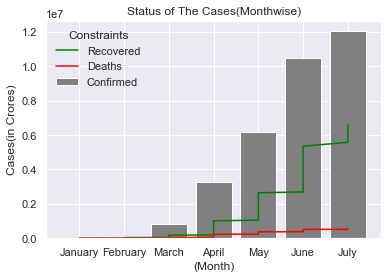

In [121]:
cpy1=byObservedDate.copy()
cpy1['ObservationDate']=cpy1['ObservationDate'].dt.month_name()
plt.bar(cpy1['ObservationDate'],cpy1['Confirmed'],color='grey',label='Confirmed')
plt.plot(cpy1['ObservationDate'],cpy1['Recovered'],color='green',label='Recovered')
plt.plot(cpy1['ObservationDate'],cpy1['Deaths'],color='red',label='Deaths')
plt.ylabel('Cases(in Crores)')
plt.xlabel('(Month)')
plt.legend(title='Constraints',frameon=False)
plt.title('Status of The Cases(Monthwise)')

### __Visualization__

According to the Last Reporting date : 2020-07-08 00:00:00


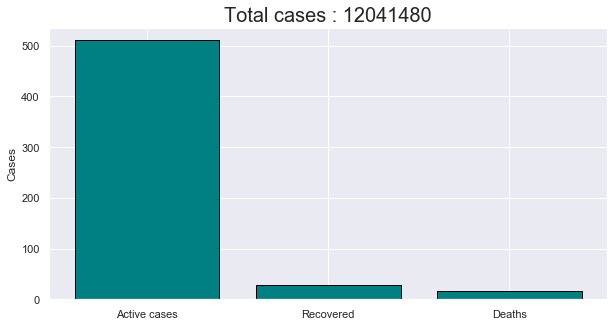

In [122]:
labels = ["Active cases","Recovered","Deaths"]
values = byObservedDate.loc[0, ["ActiveCases","Recovered","Deaths"]]
plt.figure(figsize=(10, 5))
plt.title('Total cases : '+str(byObservedDate.Confirmed[byObservedDate.Confirmed.size-1]),size=20)
plt.ylabel('Cases')
plt.bar(labels,values,color='teal',edgecolor='black')
print('According to the Last Reporting date : {}'.format(data.iat[(data.shape[0]-1),1]))

### __Mortality Rate__

#### Mortality Rate Determine how __Lethal__ a Virus can be.
#### For Context the Mortality rate for __Ebola__: 50%
#### Mortality rate is the Ratio of  __Total Number of Deaths__ to __Total Confirmed Cases__ at that __Period of time__ 
##### Note- _Mortality Rate Varies with Time Period and the Exponential Growth of the Numericals_

In [123]:
tot_deaths = data.Deaths.sum()
tot_confirmed = data.Confirmed.sum()
Mortality_rate = tot_deaths/tot_confirmed
Mortality_rate = Mortality_rate*100
print("Estimated Mortaltity Rate {:.2f}%".format(Mortality_rate))

Estimated Mortaltity Rate 5.70%


### Covid19's spread in India in contrast to Italy 

In [124]:
data.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'ActiveCases'],
      dtype='object')

In [125]:
confirmed_df = pd.read_csv('time_series_covid_19_confirmed.csv')
recovered_df = pd.read_csv('time_series_covid_19_recovered.csv')
deaths_df = pd.read_csv('time_series_covid_19_deaths.csv')

In [126]:
indian_confirmed_df = confirmed_df[confirmed_df['Country/Region'] == 'India'].reset_index()
indian_recovered_df = recovered_df[recovered_df['Country/Region'] == 'India'].reset_index()
indian_deaths_df = deaths_df[deaths_df['Country/Region'] == 'India'].reset_index()
indian_confirmed_df=indian_confirmed_df.set_index('Country/Region')
indian_confirmed_df=indian_confirmed_df.drop(['index', 'Province/State','Lat','Long'], axis = 1)
indian_recovered_df=indian_recovered_df.set_index('Country/Region')
indian_recovered_df=indian_recovered_df.drop(['index', 'Province/State','Lat','Long'], axis = 1)
indian_deaths_df=indian_deaths_df.set_index('Country/Region')
indian_deaths_df=indian_deaths_df.drop(['index', 'Province/State','Lat','Long'], axis = 1)
indian_deaths_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
India,0,0,0,0,0,0,0,0,0,0,...,16893,17400,17834,18213,18655,19268,19693,20159,20642,21129


In [127]:
confirmed = indian_confirmed_df.iloc[:, :].T
deaths = indian_deaths_df.iloc[:, :].T
recovered = indian_recovered_df.iloc[:, :].T
confirmed['Dates']=confirmed.index
confirmed['Dates']=pd.to_datetime(confirmed['Dates']).dt.month_name()
confirmed=confirmed.reset_index()
deaths['Dates']=deaths.index
deaths['Dates']=pd.to_datetime(deaths['Dates']).dt.month_name()
deaths=deaths.reset_index()
recovered['Dates']=recovered.index
recovered['Dates']=pd.to_datetime(recovered['Dates']).dt.month_name()
recovered=recovered.reset_index()
confirmed

Country/Region,index,India,Dates
0,1/22/20,0,January
1,1/23/20,0,January
2,1/24/20,0,January
3,1/25/20,0,January
4,1/26/20,0,January
...,...,...,...
164,7/4/20,673165,July
165,7/5/20,697413,July
166,7/6/20,719664,July
167,7/7/20,742417,July


In [128]:
italy_confirmed_df = confirmed_df[confirmed_df['Country/Region'] == 'Italy'].reset_index()
italy_recovered_df = recovered_df[recovered_df['Country/Region'] == 'Italy'].reset_index()
italy_deaths_df = deaths_df[deaths_df['Country/Region'] == 'Italy'].reset_index()
italy_confirmed_df=italy_confirmed_df.set_index('Country/Region')
italy_confirmed_df=italy_confirmed_df.drop(['index', 'Province/State','Lat','Long'], axis = 1)
italy_recovered_df=italy_recovered_df.set_index('Country/Region')
italy_recovered_df=italy_recovered_df.drop(['index', 'Province/State','Lat','Long'], axis = 1)
italy_deaths_df=italy_deaths_df.set_index('Country/Region')
italy_deaths_df=italy_deaths_df.drop(['index', 'Province/State','Lat','Long'], axis = 1)
italy_deaths_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Italy,0,0,0,0,0,0,0,0,0,0,...,34744,34767,34788,34818,34833,34854,34861,34869,34899,34914


In [129]:
itconfirmed = italy_confirmed_df.iloc[:, :].T
itdeaths = italy_deaths_df.iloc[:, :].T
itrecovered = italy_recovered_df.iloc[:, :].T
itconfirmed['Dates']=itconfirmed.index
itconfirmed['Dates']=pd.to_datetime(itconfirmed['Dates']).dt.month_name()
itconfirmed=itconfirmed.reset_index()
itdeaths['Dates']=itdeaths.index
itdeaths['Dates']=pd.to_datetime(itdeaths['Dates']).dt.month_name()
itdeaths=itdeaths.reset_index()
itrecovered['Dates']=itrecovered.index
itrecovered['Dates']=pd.to_datetime(itrecovered['Dates']).dt.month_name()
itrecovered=itrecovered.reset_index()
itconfirmed

Country/Region,index,Italy,Dates
0,1/22/20,0,January
1,1/23/20,0,January
2,1/24/20,0,January
3,1/25/20,0,January
4,1/26/20,0,January
...,...,...,...
164,7/4/20,241419,July
165,7/5/20,241611,July
166,7/6/20,241819,July
167,7/7/20,241956,July


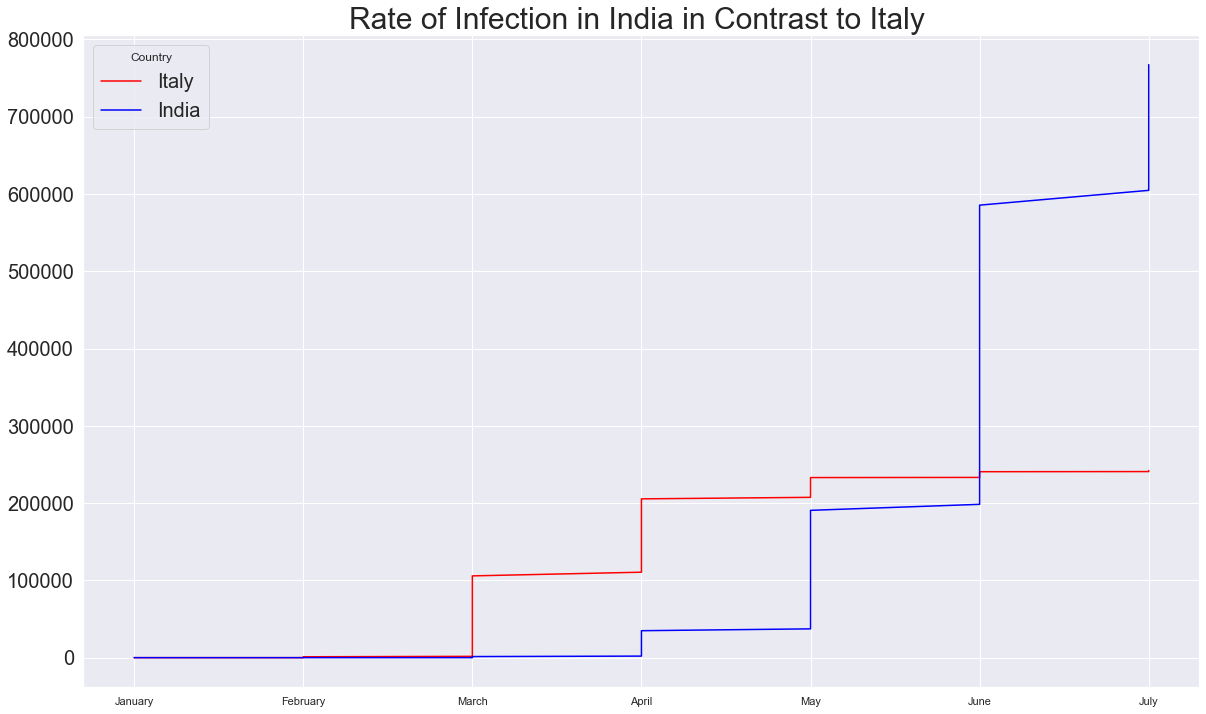

In [130]:
plt.figure(figsize=(20, 12))
plt.xlabel('', size=30)
plt.plot(itconfirmed['Dates'],itconfirmed['Italy'],label='Italy',color='red')
plt.plot(confirmed['Dates'],confirmed['India'],label='India',color='blue')
plt.yticks(size=20)
plt.legend( title='Country',prop={'size': 20})
plt.title("Rate of Infection in India in Contrast to Italy ",size =30)
plt.show()

## __Building a Model__

In [131]:
# confirmed_df = pd.read_csv('time_series_covid_19_confirmed.csv')
# recovered_df = pd.read_csv('time_series_covid_19_recovered.csv')
# deaths_df = pd.read_csv('time_series_covid_19_deaths.csv')
confirmed = confirmed.rename(columns={list(confirmed.columns)[0]: "ConfirmedCases"})
deaths = deaths.rename(columns={list(deaths.columns)[0]: "Deaths"})
recovered = recovered.rename(columns={list(recovered)[0]: "Recovered"})
confirmed.index = pd.to_datetime(confirmed.index)
deaths.index = pd.to_datetime(deaths.index)
recovered.index = pd.to_datetime(recovered.index)
print('The Dates Registered in the DataSet are\n :- {}'.format(confirmed.index))

The Dates Registered in the DataSet are
 :- DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               ...
               '1970-01-01 00:00:00.000000159',
               '1970-01-01 00:00:00.000000160',
               '1970-01-01 00:00:00.000000161',
               '1970-01-01 00:00:00.000000162',
               '1970-01-01 00:00:00.000000163',
               '1970-01-01 00:00:00.000000164',
               '1970-01-01 00:00:00.000000165',
               '1970-01-01 00:00:00.000000166',
               '1970-01-01 00:00:00.000000167',
               '1970-01-0

#### Predicting the spread of Covid19 in India 

In [132]:
# print("-- Cases According to this Dataset -- ")
# print('Indian Confirmed Cases ' + str(confirmed['ConfirmedCases'][-1]))
# print('Indian Death Cases ' + str(deaths['Deaths'][-1]))
# print('Indian Recovery Cases ' + str(recovered['Recovered'][-1]))
# indian_active_cases = (confirmed['ConfirmedCases'] - deaths['Deaths'] - recovered['Recovered'])


In [133]:
dates = confirmed.index
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
indian_cases = confirmed['ConfirmedCases'].T
indian_total_deaths = deaths['Deaths'].T
indian_total_recovered = recovered['Recovered'].T

In [134]:
# calculate rates
summation_deaths = deaths['Deaths'][-1]
summation_Confirmed = confirmed['ConfirmedCases'][-1]
summation_recovered = recovered['Recovered'][-1]
mortality_rate = summation_deaths/summation_Confirmed
recovery_rate = summation_recovered/summation_Confirmed
print('Indian Mortality Rate as per date(mention) : {:.2f}%'.format(mortality_rate*100))
print('Indian Recovery Rate as per date(mention) : {:.2f}%'.format(recovery_rate*100))

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [135]:
Future_dates_limit = 30
forcast = np.array([i for i in range(len(dates)+Future_dates_limit)]).reshape(-1, 1)
adj_dates = forcast[:-30]
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
len(forcast)

199

In [136]:
confirmed_cases = np.array(confirmed['ConfirmedCases']).reshape(-1, 1)

### __Polynomial Linear Regression__ 
##### Polynomial Regression is a form of linear regression in which the relationship between the independent variable __x__ and  the dependent vairiable __y__  is modeled as the __nth__ degree polynomial. Polynmial Regression fits a non-linear relationship between the values of x and the corresponding conditional mean y.
 

In [137]:
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(days_since_1_22) 
poly_future_forcast = poly.fit_transform(forcast)

In [138]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, confirmed_cases)
linear_pred = linear_model.predict(poly_future_forcast)

ValueError: could not convert string to float: '1/22/20'

In [139]:
# Future predictions using Polynomial Regression 
linear_pred = linear_pred.reshape(1,-1)[0]
print('Polynomial regression future predictions in INDIA : "Confirmed_Cases"')
finalresult = set(zip(future_forcast_dates[-30:], np.round(linear_pred[-30:])))
finalresult

NameError: name 'linear_pred' is not defined

##                                  __Ending Notes__ 
###  Virus is a Non-living Entity, It requires a Host for its living and Duplicating, Before we self proclaim ourselves as an Intellectually sophesticated living beings just use common sense stay home and stay safe

### Analysis by - __N. Rohan Sai__  &  __Harshith Nikhil__